# Systems of linear equations

> **⚠️ Warning**: The following Python examples are intended for educating concepts rather than for practical use. For practical implementations, consider using standard libraries such as `numpy`, `scipy` or `linalg`.

Systems of linear equations appear in multitude of applications and solving them efficiently is important.
Linear systems are ubiquitous in computational physics, such as solving circuit equations, performing data fitting, applying numerical solvers, and modeling physical systems.

Generally a system of $N$ linear equations corresponds to the following construction
\begin{align}
\sum_{j=1}^N a_{1j} x_j & = v_1,\\
\ldots \\
\sum_{j=1}^N a_{Nj} x_j & = v_N.
\end{align}
which can be written in a matrix form
$$
\mathbf{A} \mathbf{x} = \mathbf{v}.
$$
where
$$
\mathbf{A} = \left(\begin{array}{ccc} 
a_{11} & \ldots & a_{1N} \\
\ldots& \ldots & \ldots\\
a_{N1} & \ldots & a_{NN} \\
\end{array}\right)
$$ 

A unique solution to the system of equations exists if they are all linearly independent.
Alternatively, this is the case if the determinant of matrix $\mathbf{A}$ is non-zero, $\det \mathbf{A} \neq 0$.

There are many efficient libraries that exist to solve systems of linear equations efficiently, and these should be used. Nevertheless, going over the basic methods for solving linear equations is important to understand the concepts, limitations, and possible issues and solutions to them.

## Gaussian elimination and backsubstition

Gaussian elimination is the most basic approach of solving systems of linear equations.

It is based on the fact that the following two operations leave the system of equations equivalent.
1. One can multiply any equation by a constant (non-zero) factor, and it will still be the same system of equations with the same solution.
2. One can take any linear combination of two (or more) equations to get another correct equation. This new equation can replace any of the equations entering this linear combinations. In other words, we can subtract from any of the equations any other equation, and the resuling system of linear equation will stay equivalent to what we had before.

### Gaussian elimination

Gaussian elimination simplifies a system of linear equations by systematically eliminating variables from equations, reducing the system to an upper triangular form. Let us take a system of 4 equations as an example
$$
\left(\begin{array}{cccc} 
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1 \\
v_2 \\
v_3 \\
v_4
\end{array}\right)
$$


1. We start from the first row. We divide the row by $a_{11}$ such that its diagonal element is equal to unity
$$
\left(\begin{array}{cccc} 
1 & a_{12}/a_{11} & a_{13}/a_{11} & a_{14}/a_{11} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1/a_{11} \\
v_2 \\
v_3 \\
v_4
\end{array}\right)
$$

2. Then, we make all entries in the first column below the main diagonal to go to zero. To achieve that we subtract the first equation multiplied by $a_{j2}$ from the $j$th equation:
$$
\left(\begin{array}{cccc} 
1 & a_{12}/a_{11} & a_{13}/a_{11} & a_{14}/a_{11} \\
0 & a_{22} - a_{21} a_{12}/a_{11} & a_{23} - a_{21} a_{13}/a_{11} & a_{24} - a_{21} a_{14}/a_{11} \\
0 & a_{32} - a_{31} a_{12}/a_{11} & a_{33} - a_{31} a_{13}/a_{11} & a_{34} - a_{31} a_{14}/a_{11} \\
0 & a_{42} - a_{41} a_{12}/a_{11} & a_{43} - a_{41} a_{13}/a_{11} & a_{44} - a_{41} a_{14}/a_{11}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1/a_{11} \\
v_2 - a_{21} v_1/a_{11} \\
v_3 - a_{31} v_1/a_{11}\\
v_4 - a_{41} v_1/a_{11}
\end{array}\right)
$$
which we can denote as
$$
\left(\begin{array}{cccc} 
1 &  a_{12}^{'} & a_{13}^{'} & a_{14}^{'} \\
0 & a_{22}^{'} & a_{23}^{'} & a_{24}^{'} \\
0 & a_{32}^{'} & a_{33}^{'} & a_{34}^{'} \\
0 & a_{42}^{'} & a_{43}^{'} & a_{44}^{'}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1^{'} \\
v_2^{'} \\
v_3^{'} \\
v_4^{'}
\end{array}\right)
$$

3. Repeat steps 1-2 to make all elements below the main diagonal in the 2nd column go to zero
$$
\left(\begin{array}{cccc} 
1 &  a_{12}^{''} & a_{13}^{''} & a_{14}^{''} \\
0 & 1 & a_{23}^{''} & a_{24}^{''} \\
0 & 0 & a_{33}^{''} & a_{34}^{''} \\
0 & 0 & a_{43}^{''} & a_{44}^{''}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1^{''} \\
v_2^{''} \\
v_3^{''} \\
v_4^{''}
\end{array}\right)
$$

4. Repeat until all elements below the main diagonal are zero and all diagonal elements are equal to unity
$$
\left(\begin{array}{cccc} 
1 &  \tilde a_{12} & \tilde a_{13} & \tilde a_{14} \\
0 & 1 & \tilde a_{23} & \tilde a_{24} \\
0 & 0 & 1 & \tilde a_{34} \\
0 & 0 & 0 & 1
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
\tilde v_1 \\
\tilde v_2 \\
\tilde v_3 \\
\tilde v_4
\end{array}\right)
$$

*Example:* System of equations 
$$
\left(\begin{array}{cccc} 
2 & 1 & 4 & 1 \\
3 & 4 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-4 \\
3 \\
9 \\
7
\end{array}\right)
$$
becomes
$$
\left(\begin{array}{cccc} 
1 & 0.5 & 2 & 0.5 \\
0 & 1 & -2.8 & -1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-2 \\
3.6 \\
-2 \\
1
\end{array}\right)
$$

## Backsubstitution

In the end we have the following system of equations
\begin{align}
x_1 + \tilde a_{12} x_2 + \tilde a_{13} x_3 + \tilde a_{14} x_4 & = \tilde v_1, \\
x_2 + \tilde a_{23} x_3 + \tilde a_{24} x_4 & = \tilde v_2, \\
x_3 + \tilde a_{34} x_4 & = \tilde v_3, \\
x_4 & = \tilde v_4.
\end{align}

The solution now is trivial and proceeds through backsubstition, starting from 
$$
x_4 = \tilde v_4
$$
to
$$
x_3 = \tilde v_3 - \tilde a_{34} x_4
$$
to
$$
x_2 = \tilde v_4 - \tilde a_{23} x_3 - \tilde a_{24} x_4
$$
and finally to
$$
x_1 = \tilde v_4 - \tilde a_{12} x_2 - \tilde a_{13} x_3 - \tilde a_{14} x_4.
$$

The algorithm complexity is $O(n^3)$.
One limitation of simple Gaussian elimination is its susceptibility to numerical instability, especially for ill-conditioned matrices.

In [1]:
import numpy as np

def linsolve_gaussian(A0, v0):
    # Initialization
    A = A0.copy()
    v = v0.copy()
#     A = A0
#     v = v0
    N = len(v)
    
    # Gaussian elimination
    for r in range(N):
        # Divide the current row by the pivot (diagonal element)
        # Ensure diagonal element is non-zero to proceed
        div = A[r,r]
        if (div == 0.):
            print("Diagonal element is zero! Cannot solve the system with simple Gaussian elimination")
            return None
        A[r,:] /= div
        v[r]   /= div
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = A[r2,r]
            A[r2,:] -= mult * A[r,:]
            v[r2] -= mult * v[r]
            
    # Backsubstitution
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = v[r]
        for c in range(r+1,N):
            x[r] -= A[r][c] * x[c]
            
    return x

Here, we solve a system of 4 linear equations using the Gaussian elimination algorithm. The solution is verified by checking if $\mathbf{A} \mathbf{x} = \mathbf{v}$.

In [2]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)

x = linsolve_gaussian(A,v)
print(A)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## Pivoting

Simple Gaussian elimination relies on the diagonal element of the present row being non-zero.
This is not always the case: the diagonal element could be zero even in non-singular systems that have a perfectly valid solution. Simple Gaussian elimination will fail.

Consider our example where we set the very first element to zero
$$
\left(\begin{array}{cccc} 
0 & 1  & 4  & 1  \\
3 & 4  & -1 & -1 \\
1 & -4 & 1  & 5  \\
2 & -2 & 1  & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-4 \\
3 \\
9 \\
7
\end{array}\right)
$$

The system has a solution but the solver will fail

In [3]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_gaussian(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

Diagonal element is zero! Cannot solve the system with simple Gaussian elimination
x  = None


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

The solution here is to apply the so-called partial pivoting. Pivoting involves swapping rows in the matrix to ensure that the largest possible pivot element is used at each step of Gaussian elimination. This reduces round-off errors and improves stability.

Recall that the system of equations does not change if one swaps any two equations (rows). The solution thus is to swap the current row, if its diagonal element is zero, with one of the lower rows where the corresponding element is non-zero. (If all elements in all rows below are zero, we are dealing with a singular matrix that has no solutions). 

In pratice, at each step one chooses the row where the pivot element is largest in magnitude, even the pivot of the present row is non-zero. In this way one minimizes round-off error associated with the subtraction of large numbers.
In our example from above,
$$
\left(\begin{array}{cccc} 
0 & 1  & 4  & 1  \\
3 & 4  & -1 & -1 \\
1 & -4 & 1  & 5  \\
2 & -2 & 1  & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-4 \\
3 \\
9 \\
7
\end{array}\right)
$$
we will swap the first and second rows to obtain
$$
\left(\begin{array}{cccc} 
3 & 4  & -1 & -1 \\
0 & 1  & 4  & 1  \\
1 & -4 & 1  & 5  \\
2 & -2 & 1  & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
3 \\
-4 \\
9 \\
7
\end{array}\right)
$$

This procedure is performed at each step.
To implement partial pivoting we will keep track of all the row swaps by keeping a map between the original row numbers and the current ones.

In [4]:
def linsolve_gaussian_partialpivot(A0, v0):
    # Initialization
    A = A0.copy()
    v = v0.copy()
    N = len(v)
    
    # Gaussian elimination
    for r in range(N):
        # Find the pivot element (largest in magnitude)
        r_pivot = r
        for i in range(r + 1, N):
            if (abs(A[i][r]) > abs(A[r_pivot][r])):
                r_pivot = i
        
        # Swap rows to move the largest pivot element to the diagonal
        A[[r,r_pivot]] = A[[r_pivot,r]]
        v[[r,r_pivot]] = v[[r_pivot,r]]
        
        # Divide row r by the pivot element
        div = A[r,r]
        if (div == 0.):
            print("Diagonal element is zero! The system appears to be singular")
            return None
        A[r,:] /= div
        v[r]   /= div
        
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = A[r2,r]
            A[r2,:] -= mult * A[r,:]
            v[r2] -= mult * v[r]
            
    
    # Backsubstitution
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = v[r]
        for c in range(r+1,N):
            x[r] -= A[r][c] * x[c]
            
    return x

In this example, we solve a system of linear equations using Gaussian elimination with partial pivoting. The results show that the solution is accurate, even when a diagonal element starts at zero.

In [5]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_gaussian_partialpivot(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


In [6]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_gaussian_partialpivot(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## LU decomposition

Now that we have explored Gaussian elimination and pivoting, we move to LU decomposition, which builds upon these concepts for efficient solutions.

LU decomposition factors $\mathbf{A}$ into a lower triangular matrix $\mathbf{L}$ and an upper triangular matrix $\mathbf{U}$, simplifying the solution of systems of equations. This is particularly useful when the coefficient matrix $\mathbf{A}$ remains constant while the right-hand side $\mathbf{v}$ changes.

LU decomposition is the following represetation of matrix $\mathbf{A}$:
\begin{align}
\mathbf{A}  = \mathbf{L} \mathbf{U},
\end{align}
where $\mathbf{L}$ and $\mathbf{U}$ are lower and upper triangular matrices, respectively.

At the end of Gaussian elimination our matrix became upper triangular
$$
\mathbf{A x} = \mathbf{v}, \qquad \Rightarrow \qquad \mathbf{U x} = \mathbf{\tilde v},
$$

Discarding pivoting for a moment, all steps of the Gaussian elimination can be represented by matrix multiplication, i.e.
$$
\mathbf{U} = \mathbf{L_{N-1}} \ldots \mathbf{L_{0}} \mathbf{A}
$$
where e.g.
$$
\mathbf{L}_0 = 
\frac{1}{a_{11}}
\left(\begin{array}{cccc} 
1 & 0 & 0 & 0 \\
-a_{21} & a_{11} & 0  & 0 \\
-a_{31} & 0 & a_{11} & 0 \\
-a_{41} & 0 & 0 & a_{11}
\end{array}\right),
$$
$$
\mathbf{L}_1 = 
\frac{1}{a_{22}'}
\left(\begin{array}{cccc} 
a_{22}' & 0 & 0 & 0 \\
0 & 1 & 0  & 0 \\
0 & -a_{32}' & a_{22}' & 0 \\
0 & -a_{42}' & 0 & a_{22}'
\end{array}\right),
$$
and so on.

These are lower triangular matrices. Their inverses are also lower triangular matrices
$$
\mathbf{L}_0^{-1} = 
\left(\begin{array}{cccc} 
a_{11} & 0 & 0 & 0 \\
a_{21} & 1 & 0  & 0 \\
a_{31} & 0 & 1 & 0 \\
a_{41} & 0 & 0 & 1
\end{array}\right),
$$
$$
\mathbf{L}_1^{-1} = 
\left(\begin{array}{cccc} 
1 & 0 & 0 & 0 \\
0 & a_{22}' & 0  & 0 \\
0 & a_{32}' & 1 & 0 \\
0 & a_{42}' & 0 & 1
\end{array}\right),
$$
and so on.

Matrix $\mathbf{A}$ can therefore be represented as
\begin{align}
\mathbf{A} & = \mathbf{L}_0^{-1} \ldots \mathbf{L}_{N-1}^{-1} \mathbf{U}\\
& = \mathbf{L} \mathbf{U},
\end{align}
where
$$
\mathbf{L} = \mathbf{L}_0^{-1} \ldots \mathbf{L}_{N-1}^{-1} =
\left(\begin{array}{cccc} 
a_{11} & 0 & 0 & 0 \\
a_{21} & a_{22}' & 0  & 0 \\
a_{31} & a_{32}' & a_{33}'' & 0 \\
a_{41} & a_{42}' & a_{43}''  & a_{44}'''
\end{array}\right).
$$

This is the $LU$-decomposition of our matrix into a product of lower and upper triangular matrices. It is trivial to modify the Gaussian elimination code to calculate $L$ and $U$ matrices.

In [7]:
def lu_decomp(A):
    # Initialization
    U = A.copy()
    N = len(A[0])
    L = np.zeros((N,N), float)
    
    # Gaussian elimination
    for r in range(N):
        # Record elements of the lower triangular matrix L
        for r2 in range(r,N):
            L[r2][r] = U[r2][r]
            
        # Divide row r by diagonal element
        div = U[r,r]
        if (div == 0.):
            print("Diagonal element is zero! LU decomposition without pivoting is not possible!")
            return None
        U[r,:] /= div
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = U[r2,r]
            U[r2,:] -= mult * U[r,:]
            
    return L, U

In [8]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U = lu_decomp(A)
print('L   =', L)
print('U   =', U)
print('LU  =', np.dot(L,U))
print('A   =', A)

L   = [[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
U   = [[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]
LU  = [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
A   = [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


LU decomposition is useful for repeated solution of systems of linear equations
$$
\mathbf{A x} = \mathbf{v},
$$
when the matrix $\mathbf{A}$ stays the same but where the vector $\mathbf{v}$ can change.

Indeed, the system of equations becomes
$$
\mathbf{LUx} = \mathbf{v}.
$$
Let us define 
$$
\mathbf{Ux} = \mathbf{y},
$$
then
$$
\mathbf{L y} =  \mathbf{v}.
$$

We can solve the system for $\mathbf{x}$ in two steps.
1. First we solve the equation $\mathbf{L y} =  \mathbf{v}$ using forward substitution, in analogy to backsubstitution we used before.
2. Once we have $\mathbf{y}$, we can solve $\mathbf{Ux} = \mathbf{y}$ for $\mathbf{x}$ using backsubstitution.

In [9]:
def solve_using_lu(L,U,v):
    # L*U*x = v
    # First solve L*y = v with forward substitution
    # Then solve U*x = y with backsubstitution
    # Initialization
    
    N = len(v)
    # Forward substitution for L*y = v
    y = np.empty(N,float)
    for r in range(N):
        y[r] = v[r]
        for c in range(r):
            y[r] -= L[r][r - 1 - c] * y[r - 1 - c]
        y[r] /= L[r][r]
    
    # Backsubstitution for U*x = y
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = y[r]
        for c in range(r+1,N):
            x[r] -= U[r][c] * x[c]
    return x

In [10]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U = lu_decomp(A)

v = np.array([ -4, 3, 9, 7 ],float)
x = solve_using_lu(L,U,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


The computational complexity of LU decomposition is $O(n^3)$, the same as Gaussian elimination. However, for repeated solutions with different $\mathbf{v}$, the decomposition step is done only once, making it more efficient overall.

## $LU$ decomposition with pivoting

Not every non-singular matrix allows for $LU$-decomposition because diagonal elements can be zero.
In general case we need to allow the possibility to perform partial pivoting by exchanging the rows of our matrix.
If we do that, what we get $LU$-decomposition with pivoting which can be written as
$$
\mathbf{P A} = \mathbf{L U}.
$$
The permutation matrix $\mathbf{P}$ records the row swaps performed during partial pivoting, ensuring that the LU decomposition is valid for singular and near-singular matrices.

Solving the system of equations 
$$
\mathbf{A x} = \mathbf{v},
$$
is also straighforward using forward and backsubstituion passes, except that we have to exchange the rows in the vector $\mathbf{v}$ to account for the row swaps that we did. 

In cases where diagonal elements are zero or very small, partial pivoting improves numerical stability by selecting the largest pivot element, reducing round-off errors.

In [11]:
def lu_decomp_partialpivot(A):
    # Initialization
    U = A.copy()
    N = len(A[0])
    L = np.zeros((N,N), float)
    
    # Keep track of all row swaps
    row_map = [i for i in range(N)]
    
    # Gaussian elimination
    for r in range(N):
        # Find the pivot element (largest in magnitude)
        r_pivot = r
        for i in range(r + 1, N):
            if (abs(U[i][r]) > abs(U[r_pivot][r])):
                r_pivot = i
        
        row_map[r], row_map[r_pivot] = row_map[r_pivot], row_map[r]
        U[[r,r_pivot]] = U[[r_pivot,r]]
        L[[r,r_pivot]] = L[[r_pivot,r]]
        
        # Record the elements of L
        for r2 in range(r,N):
            L[r2][r] = U[r2][r]
        
        # Divide row r by the pivot element
        div = U[r,r]
        if (div == 0.):
            print("Diagonal element is zero! The system appears to be singular")
            return None
        U[r,:] /= div
        
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = U[r2,r]
            U[r2,:] -= mult * U[r,:]
            
    return L, U, row_map

In [12]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U, row_map = lu_decomp_partialpivot(A)
print('L   =', L)
print('U   =', U)
print('LU  =', np.dot(L,U))
print('A   =', A)

L   = [[ 3.          0.          0.          0.        ]
 [ 1.         -5.33333333  0.          0.        ]
 [ 2.         -1.66666667  4.25        0.        ]
 [ 2.         -4.66666667  0.5        -1.        ]]
U   = [[ 1.          1.33333333 -0.33333333 -0.33333333]
 [-0.          1.         -0.25       -1.        ]
 [ 0.          0.          1.          0.        ]
 [-0.         -0.         -0.          1.        ]]
LU  = [[ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2.  1.  4.  1.]
 [ 2. -2.  1.  3.]]
A   = [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


The matrices A and L*U coincide up to a permutation of rows, as they should.

In [13]:
def solve_using_lu_partialpivot(L,U,row_map,v):
    # L*U*x = v
    # First solve L*y = v with forward substitution
    # Then solve U*x = y with backsubstitution
    # Initialization
    
    N = len(v)
    # Backsubstitution for L*y = v
    y = np.empty(N,float)
    for rr in range(N):
        r = row_map[rr]
        y[rr] = v[r]
        for c in range(rr):
            y[rr] -= L[rr][rr - 1 - c] * y[rr - 1 - c]
        y[rr] /= L[rr][rr]
    
    # Backsubstitution for U*x = y
    x = np.empty(N,float)
    for rr in range(N-1,-1,-1):
        x[rr] = y[rr]
        for c in range(rr+1,N):
            x[rr] -= U[rr][c] * x[c]
    return x

In [14]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U, row_map = lu_decomp_partialpivot(A)
v = np.array([ -4, 3, 9, 7 ],float)
x = solve_using_lu_partialpivot(L,U,row_map,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


In [15]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U, row_map = lu_decomp_partialpivot(A)
v = np.array([ -4, 3, 9, 7 ],float)
x = solve_using_lu_partialpivot(L,U,row_map,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## Calculating the matrix inverse

The inverse $\mathbf{A}^{-1}$ of matrix $\mathbf{A}$ satisfies
$$
\mathbf{A} \mathbf{A}^{-1} = \mathbf{I}.
$$

We can therefore evaluate $\mathbf{A}^{-1}$ by solving $N$ systems of linear equations
$$
\mathbf{A} \mathbf{x}_k = \mathbf{v}_k, \qquad k = 1 \ldots N
$$
where 
$$
\mathbf{v}_{k,j} = \delta_{kj}
$$
and $\mathbf{x}_k$ is the $k$th column of the inverse matrix $\mathbf{A}^{-1}$.
Note that each equation has the same matrix $\mathbf{A}$, therefore, we can reuse the $LU$-decomposition $\mathbf{A} = \mathbf{L U}$.

The computational complexity of inverting a matrix using LU decomposition is $O(n^3)$, the same as direct methods. However, LU decomposition is more efficient for reuse when solving multiple systems of equations.

In [18]:
def matrix_inverse_with_ludecomp(A):
    # First step: LU decomposition of matrix A
    L, U, row_map = lu_decomp_partialpivot(A)
    N = len(row_map)
    
    Ainv = A.copy()
    for c in range(N):
        v = np.zeros(N, float)
        v[c] = 1.
        x = solve_using_lu_partialpivot(L,U,row_map,v)
        Ainv[:,c] = x
    
    return Ainv

In this section, we compute the matrix inverse using LU decomposition and verify the result by multiplying the matrix with its inverse. The result should be approximately the identity matrix.

Test it with our matrix

In [19]:
# if unavailable run
# pip3 install tabulate 
from tabulate import tabulate 

A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

Ainv = matrix_inverse_with_ludecomp(A)
print("A*A^{-1} = \n", tabulate(A.dot(Ainv)))

A*A^{-1} = 
 ------------  ------------  ------------  ------------
 1            -5.55112e-17   1.11022e-16  -1.11022e-16
-2.77556e-17   1            -1.11022e-16   3.33067e-16
 2.77556e-17   5.55112e-17   1             4.44089e-16
-2.77556e-17  -5.55112e-17  -5.55112e-16   1
------------  ------------  ------------  ------------


Here, we test the matrix inversion with a random matrix of a larger size to evaluate the generality and scalability of the method.

In [20]:
# A is a square random matrix of size n
n = 8
A = np.random.rand(n, n)
Ainv = matrix_inverse_with_ludecomp(A)
print("A*A^{-1} =\n", tabulate(A.dot(Ainv)))

A*A^{-1} =
 ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
 1            -5.99656e-17  -1.82773e-16  -1.52031e-16  -2.43055e-16  -2.73188e-16  -3.02291e-17   2.31419e-16
-5.23166e-17   1             1.02429e-16  -6.06064e-17   4.62205e-16   3.66022e-16  -3.18536e-16   1.90081e-16
 1.69258e-16  -6.81865e-16   1            -2.46065e-16  -2.12089e-16  -2.22237e-16   1.43684e-17   1.87233e-16
-2.26756e-17  -3.71079e-16   3.77089e-17   1            -6.92619e-16   1.71737e-16  -9.67012e-17  -4.82271e-16
-1.903e-17    -1.97257e-16   8.19161e-17   6.49946e-17   1             2.75247e-16  -2.0933e-16   -1.87141e-16
 1.06784e-16   2.22085e-16  -4.1101e-16   -2.51684e-16  -5.81629e-16   1             8.40635e-17   8.99321e-16
 8.02874e-17   5.08112e-16   2.91742e-18  -1.04034e-16   7.83533e-17  -4.42833e-18   1             3.41899e-16
 2.53577e-17  -8.82038e-16   3.72835e-17  -7.87716e-17  -7.67222e-16   2.734e-16    -4.19679e-16   1

## Tridiagonal systems

A particular case of linear systems of equations is tridiagonal systems.
In this case the matrix $\mathbf{A}$ has non-zero elements only at the main diagonal, as well lower and upper subdiagonal:
$$
\mathbf{A} = 
\left(\begin{array}{ccccc} 
d_1 & u_1  &   &  & \\
l_2 & d_2  & u_2 &  & \\
  & l_3 & \ddots  & \ddots &  \\
  &   &  \ddots  & \ddots & u_{n-1} \\
  &   &   & l_n & d_n
\end{array}\right)
~.
$$

Tridiagonal systems of linear equations often appear in physics, e.g.
- Nearest-neighbor interaction (linear chain of springs)
- Finite differences applied to partial differential equations (heat equation)

A tridiagonal system of linear equations can efficiently be solved using Gaussian elimination in linear time.
This is because one only needs to process one row at a time (the rest already have zeros in the column), and at most two elements during the elimination process.
Similarly, during the backsubstitution step, one only has to subtract a single element from the upper superdiagonal, i.e.
\begin{align}
x_n & = \tilde{v}_n, \\
x_k & = \tilde{v}_k - \tilde u_{k} x_{k+1}, \qquad k = 1\ldots N-1.
\end{align}

In [21]:
import numpy as np

# Solve tridiagonal system of linear equations
#  d: vector of diagonal elements
#  l: vector of elements on the lower subdiagonal
#  u: vector of elements on the upper superdiagonal
# v0: right-hand-side vector
def linsolve_tridiagonal(d, l, u, v0):
    # Initialization
    N = len(v0)
    a = d.copy() # Current diagonal elements
    b = u.copy() # Current upper diagonal elements
    v = v0.copy()
    
    # Gaussian elimination
    for r in range(N):
        if (a[r] == 0.):
            print("Diagonal element is zero! Cannot solve the tridiagonal system with simple Gaussian elimination")
            return None
        b[r] /= a[r]
        v[r] /= a[r]
        a[r] = 1.
        if (r < N - 1):
            a[r + 1] -= l[r+1] * b[r]
            v[r + 1] -= l[r+1] * v[r]
            
    # Backsubstitution
    x = np.empty(N,float)
    
    x[N - 1] = v[N - 1]
    for r in range(N-2,-1,-1):
        x[r] = v[r] - b[r] * x[r + 1]
            
    return x

# Returns tridiagonal vectors d,l,u of matrix A
# See also scipy.sparse.diags at https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html
def get_tridiagonal(A):
    n = len(A[0])
    d = np.zeros(n, float)
    l = np.zeros(n, float)
    u = np.zeros(n, float)
    for r in range(n):
        d[r] = A[r][r]
        if (r > 0):
            l[r] = A[r][r-1]
        if (r < n - 1):
            u[r] = A[r][r+1]
    return d, l, u

In [22]:
A = np.array([[ 2,  1,  0,  0 ],
           [ 3,  4, -5,  0 ],
           [ 0, -4,  3,  5 ],
           [ 0,  0,  1,  3 ]],float)

v = np.array([ -4, 3, 9, 7 ],float)

x = linsolve_tridiagonal(*(get_tridiagonal(A)), v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [-2.04  0.08 -1.76  2.92]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


Test for a random tridiagonal matrix

In [23]:
def random_tridiagonal(n):
    A = np.random.rand(n, n)
    for r in range(n):
        for c in range(0,r-1):
            A[r][c] = 0.
        for c in range(r + 2, n):
            A[r][c] = 0.
    return A

In [24]:
%%time

n = 5000
A = random_tridiagonal(n)
# print("A =\n", tabulate(A))
v = np.random.rand(n)
x = linsolve_tridiagonal(*(get_tridiagonal(A)),v)
print(" x = ", x)
print("Ax = ", A.dot(x))
print(" v = ", v)

 x =  [ 0.50650253  0.72652636 -3.37949485 ...  9.6947616   4.14125389
 -8.35797187]
Ax =  [0.53846347 0.584372   0.49716602 ... 0.76883773 0.4259966  0.02554295]
 v =  [0.53846347 0.584372   0.49716602 ... 0.76883773 0.4259966  0.02554295]
CPU times: user 2.57 s, sys: 37.2 ms, total: 2.6 s
Wall time: 2.59 s


In [26]:
%%time

L, U, row_map = lu_decomp_partialpivot(A)
x = solve_using_lu_partialpivot(L,U,row_map,v)
print(" x = ", x)
print("Ax = ", A.dot(x))
print(" v = ", v)

 x =  [ 0.50650253  0.72652636 -3.37949485 ...  9.6947616   4.14125389
 -8.35797187]
Ax =  [0.53846347 0.584372   0.49716602 ... 0.76883773 0.4259966  0.02554295]
 v =  [0.53846347 0.584372   0.49716602 ... 0.76883773 0.4259966  0.02554295]
CPU times: user 57.4 s, sys: 847 ms, total: 58.3 s
Wall time: 58.6 s


Let us apply it to the springs example from Section 6.1 of M. Newman *Computational Physics*

We have linear chain of strings. The amplitudes $x_i$ of the vibration obey

\begin{align}
(\alpha - k) x_1 - k x_2 & = 0, \\
\alpha x_i - k x_{i-1} - k x_{i+1} & = 0, \quad i = 2,\ldots, N-1, \\
(\alpha - k) x_N - k x_{N-1} & = 0. 
\end{align}

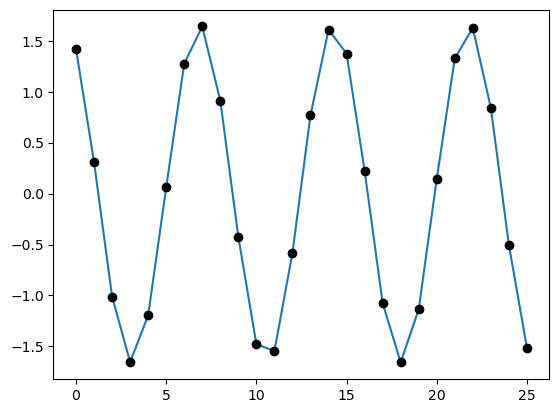

In [27]:
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = np.empty([N,N],float)
for i in range(N):
    if i>0:
        A[i,i-1] = -k
    A[i,i] = alpha
    if i<N-1:
        A[i,i+1] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = np.zeros(N,float)
v[0] = C

# Solve the equations
x = linsolve_tridiagonal(*(get_tridiagonal(A)),v)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

Figure 6.1 is reproduced

## Banded systems

Band-diagonal system: in each row
- at most $m_{\rm lower}$ non-zero elements to the left of the main diagonal
- at most $m_{\rm upper}$ non-zero elements to the right of the main diagonal

E.g. for $m_{\rm lower} = m_{\rm upper} = 2$:
$$
\mathbf{A} = 
\left(\begin{array}{ccccccc} 
d_1 & u_{1,1}  & u_{2,1}  &  & & &\\
l_{1,2} & d_2  & u_{1,2}  & u_{2,2}  & & &\\
l_{2,3} & l_{1,3} & d_3  & u_{1,3}  & u_{2,3} & &\\
 & l_{2,4} & l_{1,4} & \ddots & \ddots & \ddots & \\
 & & \ddots & \ddots & \ddots & u_{1,n-2} & u_{2,n-2} \\
 & &    & \ddots & \ddots & \ddots & u_{1,n-1} \\
 & & & & l_{2,n} & l_{1,n} & d_n
\end{array}\right)
~.
$$


Solving band-diagonal system of equations also proceeds through Gaussian elimination.
At each step one has to normalize $m_{\rm upper} + 1$ elements in the current row,
then subtract the current row from at most $m_{\rm lower}$ rows below it.
The overall complexity is thus $O(N \, m_{\rm lower} \, m_{\rm upper})$.
The procedure is thus very efficient when $m_{\rm lower}, m_{\rm upper} \ll N$.

Tridiagonal matrix is a special case with $m_{\rm lower} = m_{\rm upper} = 1$.

In [28]:
import numpy as np

# Solving linear system of banded equations
# d: diagonal elements of the banded matrix
# l: lower non-zero diagonals of the banded matrix
# u: upper non-zero diagonals of the banded matrix
# v0: r.h.s. vector
def linsolve_banded(d, l, u, v0):
    # Initialization
    v = v0.copy()
    N = len(v)
    mlower = len(l)
    mupper = len(u)
    
    a    = d.copy() # Diagonal elements
    dup  = u.copy() # Upper diagonal elements
    dlow = l.copy() # Lower diagonal elements
    
    # Gaussian elimination
    for r in range(N):
        # Divide row r by diagonal element
        div = a[r]
        if (div == 0.):
            print("Diagonal element is zero! Cannot solve the system with simple Gaussian elimination")
            return None
        for c in range(r+1,min(r + mupper + 1,N)):
            dup[c-r-1,r] /= div
        a[r] /= div
        v[r] /= div
        
        # Now subtract this row from the lower rows
        # We do not need to go through all the rows
        # but only up to a certain row depending
        # on the number of non-zero elements to right and left of the main diagonal
        max_row = min(r + mlower, N - 1)
        
        # First the vector
        for r2 in range(r+1,max_row + 1):
            v[r2] -= dlow[r2 - r - 1, r2] * v[r]
            
        # Then the matrix rows
        for c in range(r + 1,min(r + mupper + 1,N)):
            for r2 in range(r+1,max_row + 1):
                if (c == r2):
                    a[r2] -= dlow[r2 - r - 1, r2] * dup[c-r-1,r]
                elif (c < r2 and r2 - c - 1 < mlower):
                    dlow[r2 - c - 1,r2] -= dlow[r2 - r - 1, r2] * dup[c-r-1,r]
                elif (c > r2 and c - r2 - 1 < mupper):
                    dup[c - r2 - 1,r2] -= dlow[r2 - r - 1, r2] * dup[c-r-1,r]
            
    # Backsubstitution
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = v[r]
        for c in range(r+1,min(r + mupper + 1,N)):
            x[r] -= dup[c - r - 1,r] * x[c]
            
    return x

# Returns band-diagonal elements d,l,u of matrix A
# See also scipy.sparse.diags at https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html
def get_banded(A, mlower, mupper):
    n = len(A[0])
    d = np.zeros(n, float)
    l = np.zeros((mlower,n), float)
    u = np.zeros((mupper,n), float)
    for r in range(n):
        d[r] = A[r][r]
        for c in range(max(0,r - mlower),r):
            l[r-c-1,r] = A[r][c]
        for c in range(r+1,min(r+mupper+1,n)):
            u[c-r-1,r] = A[r][c]
    return d, l, u

In [29]:
A = np.array([[ 2,  1,  0,  0 ],
           [ 3,  4, -5,  0 ],
           [ 0, -4,  3,  5 ],
           [ 0,  0,  1,  3 ]],float)

v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_banded(*(get_banded(A,1,1)), v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [-2.04  0.08 -1.76  2.92]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


In [30]:
def random_banded(n, mlower, mupper):
    A = np.random.rand(n, n)
    for r in range(n):
        for c in range(0,r-mlower):
            A[r][c] = 0.
        for c in range(r + mupper + 1, n):
            A[r][c] = 0.
    return A

In [31]:
n = 10
mupper = 4
mlower  = 3
A = random_banded(n, mlower, mupper)
print("A =\n", tabulate(A))
v = np.random.rand(n)
x = linsolve_banded(*(get_banded(A,mlower,mupper)),v)
print(" x = ", x)
print("Ax = ", A.dot(x))
print(" v = ", v)

A =
 --------  ---------  ---------  ---------  ---------  --------  ---------  --------  --------  ---------
0.339089  0.425374   0.608148   0.99282    0.559892   0         0          0         0         0
0.682256  0.196732   0.047846   0.0809591  0.475877   0.871224  0          0         0         0
0.51193   0.0589133  0.857931   0.817493   0.107546   0.686704  0.05595    0         0         0
0.803584  0.620484   0.0260938  0.354983   0.0235425  0.666172  0.949641   0.696003  0         0
0         0.923449   0.522509   0.961997   0.04002    0.964269  0.0749992  0.877955  0.242533  0
0         0          0.908196   0.578138   0.756524   0.749277  0.957537   0.276867  0.108327  0.0749192
0         0          0          0.739343   0.433746   0.118236  0.506705   0.897381  0.166318  0.717684
0         0          0          0          0.989404   0.520105  0.465202   0.995558  0.505746  0.854393
0         0          0          0          0          0.93188   0.762252   0.682169  0.77507

Let us apply it to the springs example from Section 6.1 of M. Newman *Computational Physics*

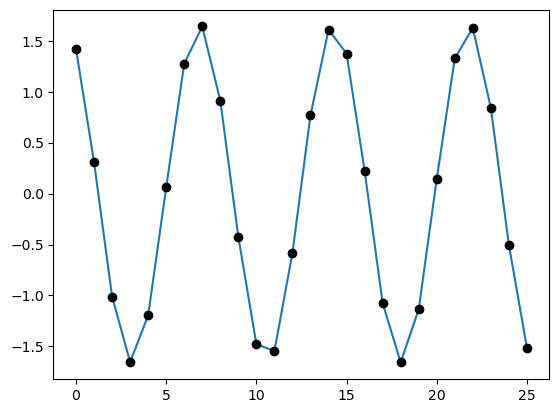

In [32]:
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = np.empty([N,N],float)
for i in range(N):
    if i>0:
        A[i,i-1] = -k
    A[i,i] = alpha
    if i<N-1:
        A[i,i+1] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = np.zeros(N,float)
v[0] = C

# Solve the equations
x = linsolve_banded(*(get_banded(A,1,1)),v)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

## QR decomposition

Another useful decomposition of a square matrix $\mathbf{A}$ is QR decomposition.
Any real square matrix $\mathbf{A}$ can be written in a form
$$
\mathbf{A} = \mathbf{Q R},
$$
where $\mathbf{Q}$ is an orthogonal matrix, i.e. $\mathbf{Q^{-1}} = \mathbf{Q^T}$ thus
$$
\mathbf{Q^T Q} = \mathbf{I},
$$
and $\mathbf{R}$ is upper triangular matrix.

There are many algorithms for constructing the QR decomposition, from simple [Gram-Schimdt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) to more involved methods using Householder transformation and Givens rotations. We will not go into detail into these methods as they are readily implemented in linear algebra packages.

In [33]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

print('A      =\n', tabulate(A))
Q, R = np.linalg.qr(A)
print('Q      =\n', tabulate(Q))
print('R      =\n', tabulate(R))
print('Q^T Q  =\n', np.dot(Q.transpose(),Q))

A      =
 -  --  --  --
2   1   4   1
3   4  -1  -1
1  -4   1   5
2  -2   1   3
-  --  --  --
Q      =
 ---------  ----------  ---------  ----------
-0.471405  -0.0563436   0.875765  -0.0874017
-0.707107  -0.507093   -0.436141  -0.229429
-0.235702   0.732467   -0.141898  -0.622737
-0.471405   0.450749   -0.150604   0.742914
---------  ----------  ---------  ----------
R      =
 --------  --------  --------  ---------
-4.24264  -1.41421  -1.88562  -2.35702
 0        -5.91608   1.46493   5.46533
 0         0         3.6467    0.150604
 0         0         0        -0.742914
--------  --------  --------  ---------
Q^T Q  =
 [[ 1.00000000e+00 -4.51958521e-17 -1.57054640e-16  3.42526633e-17]
 [-4.51958521e-17  1.00000000e+00  3.18817176e-17  8.09596522e-17]
 [-1.57054640e-16  3.18817176e-17  1.00000000e+00  1.68578756e-16]
 [ 3.42526633e-17  8.09596522e-17  1.68578756e-16  1.00000000e+00]]


## Systems of linear equations with QR decomposition

Suppose we have a system of linear equations
$$
\mathbf{A} \mathbf{x} = \mathbf{v}.
$$

If $\mathbf{A} = \mathbf{Q R}$ we can rewrite it as
$$
\mathbf{Q R} \mathbf{x} = \mathbf{v}.
$$

Multiplying each sides of the equation by $\mathbf{Q^T}$, we have
$$
\mathbf{R} \mathbf{x} = \mathbf{Q^T v}.
$$

The matrix $\mathbf{R}$ is upper triangular, thus, the system can solved using backsubstitution.

In [34]:
def linsolve_using_qr(Q,R,v):
    # Initialization
    N = len(v)
    # Calculate y = Q^T v
    y = np.zeros(N,float)
    for r in range(N):
        for c in range(N):
            y[r] += Q[c][r] * v[c]
    
    # Backsubstitution for R*x = y
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = y[r]
        for c in range(r+1,N):
            x[r] -= R[r][c] * x[c]
            
        x[r] /= R[r][r]
    return x

In [35]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

Q, R = np.linalg.qr(A)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_using_qr(Q,R,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## Eigenvalues and eigenvectors

A common matrix problem in physics is the calculation of eigenvalues and eigenvectors of a matrix (e.g. classical and quantum mechanics). The eigenvalue problem corresponds to the equation
$$
\mathbf{A v} = \lambda \mathbf{v}.
$$

In most cases the matrix $\mathbf{A}$ is either real symmetric or Hermitian (in case of complex numbers). 
In this case, for a $N$x$N$ matrix there are $N$ eigenvectors $\mathbf{v}_1 \ldots\mathbf{v}_N$ with real eigenvalues $\lambda_1 \ldots \lambda_N$. The eigenvectors are orthogonal, i.e. $\mathbf{v}_i \cdot \mathbf{v}_j = \delta_{i,j}$ with appropriate normalization. 
The eigenvalue problem can thus be cast as a matrix equation
$$
\mathbf{A V} = \mathbf{V D}.
$$
Here $\mathbf{V}$ is the matrix of eigenvectors, i.e. column $k$ corresponds to the eigenvector $\mathbf{v}_k$, and $\mathbf{D}$ is a diagonal matrix with entries corresponding to eigenvalues, $D_{ij} = \delta_{ij} \lambda_i$.
Since eigenvectors are orthonormal, one has $\mathbf{V^T V} = \mathbf{V V^T} = \mathbf{I}$.

## QR algorithm

QR algorithm is a method of finding eigenvalues and/or eigenvectors. It is based on the following iterative procedure.

1. One starts with matrix $\mathbf{A}_1 = \mathbf{A}$ can calculates its QR decomposition $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$.
2. The next matrix is computed as $\mathbf{A}_2 = \mathbf{R}_1 \mathbf{Q}_1$. This is a similarity transform. Multiplying both sides by $\mathbf{I} = \mathbf{Q}_1^T \mathbf{Q}_1$ and taking into account $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$ one gets $\mathbf{A}_2 = \mathbf{Q}_1^T \mathbf{A}_1 \mathbf{Q}_1$.
3. The process is repeated as follows, $\mathbf{A}_{n+1} = \mathbf{R}_n \mathbf{Q}_n = \mathbf{Q}_n^T \mathbf{A}_n \mathbf{Q}_n$.
4. Matrix $\mathbf{A}_n$ converges to diagonal form in the limit $n \to \infty$ (for real symmetric $\mathbf{A}$). It can be written as
$$
\mathbf{A_{\infty}} = \mathbf{Q}^T \mathbf{A} \mathbf{Q},
$$
where
$$
\mathbf{Q} = \prod_{k=1}^\infty \mathbf{Q}_k
$$
is an orthogonal matrix.

Multiplying $\mathbf{A_{\infty}}$ by $\mathbf{Q}$ from the right we get an equation
$$
\mathbf{A} \mathbf{Q} = \mathbf{Q} \mathbf{A_\infty}.
$$
Comparing to the matrix eigenvalue equation $\mathbf{A V} = \mathbf{V D}$ one recognizes that $\mathbf{Q} \equiv \mathbf{V}$ is the matrix of eigenvectors and $\mathbf{A_\infty} = \mathbf{D}$ is the eigenvector matrix.

In pracice, the algorithm stops once non-diagonal elements of $\mathbf{A}_n$ are below a certain threshold $\epsilon$.

In [36]:
def eigen_qr_simple(A, iterations=1000, toprint=True):
    Ak = np.copy(A)
    n = len(A[0])
    QQ = np.eye(n)
    for k in range(iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = np.dot(R,Q)
        QQ = np.dot(QQ,Q)
        if k%100 == 0 and toprint:
            print("A",k,"=")
            print(tabulate(Ak))
            print("\n")
    return Ak, QQ

In [37]:
eigen_qr_simple([[1,2],[2,1]])

A 0 =
---  ----
2.6   1.2
1.2  -0.6
---  ----


A 100 =
----------  ------------
3            2.18743e-16
2.5871e-48  -1
----------  ------------


A 200 =
-----------  ------------
3             2.18743e-16
5.01982e-96  -1
-----------  ------------


A 300 =
------------  ------------
3              2.18743e-16
9.74008e-144  -1
------------  ------------


A 400 =
------------  ------------
3              2.18743e-16
1.88989e-191  -1
------------  ------------


A 500 =
----------  ------------
3            2.18743e-16
3.667e-239  -1
----------  ------------


A 600 =
------------  ------------
3              2.18743e-16
7.11518e-287  -1
------------  ------------


A 700 =
-  ------------
3   2.18743e-16
0  -1
-  ------------


A 800 =
-  ------------
3   2.18743e-16
0  -1
-  ------------


A 900 =
-  ------------
3   2.18743e-16
0  -1
-  ------------




(array([[ 3.0000000e+00,  2.1874317e-16],
        [ 0.0000000e+00, -1.0000000e+00]]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [38]:
eigen_qr_simple([[1,1],[-1,3]])

A 0 =
-  -----------
2  1.36716e-16
2  2
-  -----------


A 100 =
----------  -------
2.02        -1.9998
0.00019998   1.98
----------  -------


A 200 =
-----------  --------
2.01         -1.99995
4.99988e-05   1.99
-----------  --------


A 300 =
----------  --------
2.00667     -1.99998
2.2222e-05   1.99333
----------  --------


A 400 =
-----------  --------
2.005        -1.99999
1.24999e-05   1.995
-----------  --------


A 500 =
-----------  --------
2.004        -1.99999
7.99997e-06   1.996
-----------  --------


A 600 =
-----------  --------
2.00333      -1.99999
5.55554e-06   1.99667
-----------  --------


A 700 =
-----------  --------
2.00286      -2
4.08162e-06   1.99714
-----------  --------


A 800 =
---------  -------
2.0025     -2
3.125e-06   1.9975
---------  -------


A 900 =
-----------  --------
2.00222      -2
2.46913e-06   1.99778
-----------  --------




(array([[ 2.002002e+00,  1.999998e+00],
        [-2.004004e-06,  1.997998e+00]]),
 array([[-0.70639861,  0.70781424],
        [-0.70781424, -0.70639861]]))

In [39]:
n = 5
A = np.random.rand(n, n)
# Make symmetric
for r in range(n):
    for c in range(r):
        A[r][c] = A[c][r]
print("A=")
print(tabulate(A))
print("\n")

print("AA* = ")
print(tabulate(np.dot(A,A.transpose())))
print("\n")

print("A*A = ")
print(tabulate(np.dot(A.transpose(),A)))
print("\n")

# We call the function    
AQ = eigen_qr_simple(A)

# Print A' = D
print("A' =\n",tabulate(AQ[0]))
print("Q  =\n",tabulate(AQ[1]))

# We compare our results with the official numpy algorithm
# print(np.linalg.eig(A))

P = AQ[0]

# Check orthogonality
print("v1*v2 = ",  P[:,0].dot(P[:,1]))

A=
---------  --------  ---------  --------  ---------
0.15828    0.400513  0.0243338  0.987249  0.297977
0.400513   0.130502  0.610793   0.954279  0.998151
0.0243338  0.610793  0.825003   0.509556  0.955404
0.987249   0.954279  0.509556   0.13639   0.304766
0.297977   0.998151  0.955404   0.304766  0.0789427
---------  --------  ---------  --------  ---------


AA* = 
--------  -------  -------  --------  --------
1.24951   1.37006  1.05631  0.776326  0.794588
1.37006   2.45746  2.03326  1.26553   1.20279
1.05631   2.03326  2.22674  1.38795   1.63584
0.776326  1.26553  1.38795  2.25644   1.79915
0.794588  1.20279  1.63584  1.79915   2.09701
--------  -------  -------  --------  --------


A*A = 
--------  -------  -------  --------  --------
1.24951   1.37006  1.05631  0.776326  0.794588
1.37006   2.45746  2.03326  1.26553   1.20279
1.05631   2.03326  2.22674  1.38795   1.63584
0.776326  1.26553  1.38795  2.25644   1.79915
0.794588  1.20279  1.63584  1.79915   2.09701
--------  ------